# LCA of Bitcoin (consequential model)

Initial set up

In [1]:
import pandas as pd
import numpy as np
from lci_to_bw2 import *
from brightway2 import *
from matplotlib import pyplot as plt
import time
when = time.strftime("%Y%m%d")

In [2]:
projects.set_current('BTC_LCA') # Bitcoin Version 1

In [3]:
projects

Brightway2 projects manager with 8 objects:
	BTC01
	BTC_Att_01
	BTC_Att_LCA
	BTC_LCA
	CCU
	EmTech
	advlca19
	default
Use `projects.report()` to get a report on all projects.

In [6]:
fpei34  = "/Users/susanne/Documents/Objective_1/Databases/Ecoinvent_conseq_3.4/datasets"
 
if 'ecoinvent 3.4 conseq' in databases:
     print("Database has already been imported")
else:
     ei34 = SingleOutputEcospold2Importer(fpei34, 'ecoinvent 3.4 conseq')
     ei34.apply_strategies()
     ei34.statistics()
 
ei34.write_database()

Extracting XML data from 13330 datasets
Extracted 13330 datasets in 42.33 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
2 exchanges couldn't be linked and were deleted. See the logfile for details:
	/Users/susanne/Library/Logs/Brightway3/BTC_LCA.bebb8c38d664b73c746b744c4

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:25


Title: Writing activities to SQLite3 database:
  Started: 05/20/2019 14:25:50
  Finished: 05/20/2019 14:26:15
  Total time elapsed: 00:00:25
  CPU %: 93.10
  Memory %: 6.42
Created database: ecoinvent 3.4 conseq


Brightway2 SQLiteBackend: ecoinvent 3.4 conseq

In [ ]:
bw2setup() # do this if its the first time only

In [4]:
databases

Databases dictionary with 3 object(s):
	BTC
	biosphere3
	ecoinvent 3.4 conseq

## Data import

Now import the inventory. From here all steps have to be **repeated for each of the three scenarios**. 

In [39]:
#change name of file depending on which scenario is to be run
BTC_data = pd.read_csv('Consequential_Scenario2.csv', header = 0, sep = ";", encoding = 'utf-8-sig') 
# important to specify encoding

# clean up 
BTC_data = BTC_data.drop(['Notes'], 1)  # remove the columns not needed
BTC_data['Exchange uncertainty type'] = BTC_data['Exchange uncertainty type'].fillna(0).astype(int) 

print(BTC_data.head())
print(BTC_data.tail())  

  Activity database    Activity code    Activity name Activity unit  \
0               BTC  Bitcoin Network  Bitcoin Network   Tera Hashes   
1               BTC  Bitcoin Network  Bitcoin Network   Tera Hashes   
2               BTC  Bitcoin Network  Bitcoin Network   Tera Hashes   
3               BTC  Bitcoin Network  Bitcoin Network   Tera Hashes   
4               BTC  Bitcoin Network  Bitcoin Network   Tera Hashes   

  Activity type Exchange database   Exchange input  Exchange amount  \
0       process               BTC  Bitcoin Network            1.000   
1       process               BTC     Miners_CN_SC            0.305   
2       process               BTC     Miners_CN_XJ            0.107   
3       process               BTC     Miners_CN_NM            0.123   
4       process               BTC     Miners_US_WA            0.062   

  Exchange unit Exchange type  Exchange uncertainty type  Exchange loc  \
0   Tera Hashes    production                          0           NaN  

In [40]:
# Create a dict that can be written as database
BTC_dict = lci_to_bw2(BTC_data) # Perfect.

In [41]:
# Write a bw2 database
databases
if 'BTC' in databases: del databases['BTC']
BTC = Database("BTC")
BTC.write(BTC_dict)
#[print(act) for act in BTC]

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/23/2019 08:53:31
  Finished: 05/23/2019 08:53:31
  Total time elapsed: 00:00:00
  CPU %: 74.80
  Memory %: 1.89


## Static LCA

In [42]:
acts = []
for activity in Database("BTC"):
        acts.append(activity['name'])
acts.sort()
acts

['Avalon production',
 'Avalon_CA_AB',
 'Avalon_CA_BC',
 'Avalon_CA_QC',
 'Avalon_CN_NM',
 'Avalon_CN_SC',
 'Avalon_CN_XJ',
 'Avalon_GE',
 'Avalon_IS',
 'Avalon_NO',
 'Avalon_RU',
 'Avalon_SE',
 'Avalon_US_NY',
 'Avalon_US_WA',
 'Bitcoin Network',
 'Ebang production',
 'Ebang_CA_AB',
 'Ebang_CA_BC',
 'Ebang_CA_QC',
 'Ebang_CN_NM',
 'Ebang_CN_SC',
 'Ebang_CN_XJ',
 'Ebang_GE',
 'Ebang_IS',
 'Ebang_NO',
 'Ebang_RU',
 'Ebang_SE',
 'Ebang_US_NY',
 'Ebang_US_WA',
 'El_production_CA_AB [Electricity]',
 'El_production_CA_BC [Electricity]',
 'El_production_CA_QC [Electricity]',
 'El_production_CN_NM [Electricity]',
 'El_production_CN_SC [Electricity]',
 'El_production_CN_XJ [Electricity]',
 'El_production_GE [Electricity]',
 'El_production_IS [Electricity]',
 'El_production_NO [Electricity]',
 'El_production_RU [Electricity]',
 'El_production_SE [Electricity]',
 'El_production_US_NY [Electricity]',
 'El_production_US_WA [Electricity]',
 'EoL  [treatment of Avalon]',
 'EoL  [treatment of Ebang]'

In [43]:
#all analyzed impact categories
mylist = [('IPCC 2013', 'climate change', 'GWP 100a'),
         ('ReCiPe Midpoint (H)', 'agricultural land occupation', 'ALOP'),
         ('ReCiPe Midpoint (H)', 'climate change', 'GWP100'),
         ('ReCiPe Midpoint (H)', 'fossil depletion', 'FDP'),
         ('ReCiPe Midpoint (H)', 'freshwater ecotoxicity', 'FETPinf'),
         ('ReCiPe Midpoint (H)', 'freshwater eutrophication', 'FEP'),
         ('ReCiPe Midpoint (H)', 'human toxicity', 'HTPinf'),
         ('ReCiPe Midpoint (H)', 'ionising radiation', 'IRP_HE'),
         ('ReCiPe Midpoint (H)', 'marine ecotoxicity', 'METPinf'),
         ('ReCiPe Midpoint (H)', 'marine eutrophication', 'MEP'),
         ('ReCiPe Midpoint (H)', 'metal depletion', 'MDP'),
         ('ReCiPe Midpoint (H)', 'natural land transformation', 'NLTP'),
         ('ReCiPe Midpoint (H)', 'ozone depletion', 'ODPinf'),
         ('ReCiPe Midpoint (H)', 'particulate matter formation', 'PMFP'),
         ('ReCiPe Midpoint (H)', 'photochemical oxidant formation', 'POFP'),
         ('ReCiPe Midpoint (H)', 'terrestrial acidification', 'TAP100'),
         ('ReCiPe Midpoint (H)', 'terrestrial ecotoxicity', 'TETPinf'),
         ('ReCiPe Midpoint (H)', 'urban land occupation', 'ULOP'),
         ('ReCiPe Midpoint (H)', 'water depletion', 'WDP')]

In [44]:
mymethod = ('IPCC 2013', 'climate change', 'GWP 100a')
mymethod

('IPCC 2013', 'climate change', 'GWP 100a')

In [45]:
#Change number in acts depending on which scenario
# 26 for BAU
# 14 Scenario 2
# 7  Scenario 3
myact = Database('BTC').get(acts[14]) 

In [46]:
functional_unit = {myact: 1} 
lca = LCA(functional_unit, mymethod)
lca.lci()
lca.lcia()
print(lca.score)

8.566690127798572e-06


Everything worked so now preparing for doing this **in loop** to all activities under analysis

In [47]:
def dolcacalc(myact, mydemand, mymethod):
    my_fu = {myact: mydemand} 
    lca = LCA(my_fu, mymethod)
    lca.lci()
    lca.lcia()
    return lca.score

def getLCAresults(acts, mymethod):
    
    all_activities = []
    results = []
    for a in acts:
        act = Database('BTC').get(a)
        all_activities.append(act['name'])
        results.append(dolcacalc(act,1,mymethod)) # 1 stays for one unit of each process
        #print(act['name'])
     
    results_dict = dict(zip(all_activities, results))
    
    return results_dict


In [48]:
results_BTC = []
for m in mylist:
    results_all_acts = getLCAresults(acts,m) # total impact per tech
    results_BTC.append(results_all_acts)

In [49]:
methods_names = []
for m in mylist:
    m_name = ' '.join(m)
    methods_names.append(m_name)

In [50]:
my_output = pd.DataFrame(results_BTC, index=methods_names)
my_output

,Avalon production,Avalon_CA_AB,Avalon_CA_BC,Avalon_CA_QC,Avalon_CN_NM,Avalon_CN_SC,Avalon_CN_XJ,Avalon_GE,Avalon_IS,Avalon_NO,...,S15_CN_NM,S15_CN_SC,S15_CN_XJ,S15_GE,S15_IS,S15_NO,S15_RU,S15_SE,S15_US_NY,S15_US_WA
IPCC 2013 climate change GWP 100a,147.393250,4.792099e-06,4.849963e-06,4.711988e-06,1.928558e-05,8.192538e-06,1.656485e-05,9.559920e-06,9.433411e-06,6.896645e-07,...,1.972621e-05,8.377169e-06,1.694269e-05,9.776107e-06,9.646677e-06,7.011523e-07,5.124384e-06,3.877121e-06,2.775225e-06,2.599936e-06
ReCiPe Midpoint (H) agricultural land occupation ALOP,23.676871,1.311251e-06,1.311381e-06,1.301853e-06,3.086415e-07,1.345619e-07,2.601300e-07,5.056438e-07,4.990828e-07,8.400201e-07,...,3.152109e-07,1.371141e-07,2.655799e-07,5.167594e-07,5.100470e-07,8.588522e-07,1.173978e-06,7.009083e-06,8.891905e-08,8.130193e-08
ReCiPe Midpoint (H) climate change GWP100,144.509593,4.744741e-06,4.798866e-06,4.664936e-06,1.877775e-05,7.980600e-06,1.613629e-05,9.509829e-06,9.383951e-06,6.687331e-07,...,1.920676e-05,8.160447e-06,1.650435e-05,9.724966e-06,9.596183e-06,6.798445e-07,5.081947e-06,3.831954e-06,2.713243e-06,2.542100e-06
ReCiPe Midpoint (H) fossil depletion FDP,42.476037,1.887416e-06,1.903748e-06,1.886934e-06,4.419833e-06,1.869361e-06,3.732177e-06,3.354159e-06,3.309663e-06,1.472895e-07,...,4.520561e-06,1.911232e-06,3.817036e-06,3.430295e-06,3.384772e-06,1.494201e-07,1.613409e-06,1.625500e-06,9.644139e-07,9.046090e-07
ReCiPe Midpoint (H) freshwater ecotoxicity FETPinf,19.531846,4.637368e-07,4.639175e-07,1.862114e-07,4.723644e-07,4.190150e-08,3.091999e-07,4.650977e-07,4.596123e-07,7.082220e-07,...,4.828837e-07,4.248709e-08,3.159539e-07,4.754494e-07,4.698374e-07,7.241843e-07,4.010844e-07,5.545439e-07,6.019619e-07,5.871137e-07
ReCiPe Midpoint (H) freshwater eutrophication FEP,0.501580,1.216323e-09,1.217051e-09,7.959861e-10,3.623277e-09,1.420458e-09,2.956605e-09,1.067913e-08,1.054100e-08,1.545955e-09,...,3.694948e-09,1.441294e-09,3.012891e-09,1.091363e-08,1.077231e-08,1.569687e-09,3.445955e-09,1.397473e-09,1.667443e-09,1.576085e-09
ReCiPe Midpoint (H) human toxicity HTPinf,839.784195,2.534363e-06,2.536412e-06,1.643491e-06,4.445983e-06,1.594850e-06,3.526940e-06,7.610127e-06,7.516453e-06,3.085926e-06,...,4.529781e-06,1.612852e-06,3.589529e-06,7.766943e-06,7.671108e-06,3.138337e-06,3.816393e-06,4.174517e-06,3.102777e-06,2.942926e-06
ReCiPe Midpoint (H) ionising radiation IRP_HE,7.020323,1.764315e-08,1.765362e-08,1.750490e-08,4.997418e-08,2.278971e-08,4.175819e-08,1.076303e-06,1.061963e-06,1.631508e-08,...,5.088907e-08,2.307726e-08,4.248347e-08,1.100903e-06,1.086231e-06,1.645321e-08,6.116813e-06,1.672810e-08,1.558239e-08,1.299976e-08
ReCiPe Midpoint (H) marine ecotoxicity METPinf,18.056361,4.062009e-07,4.062672e-07,1.656467e-07,4.145506e-07,3.916658e-08,2.725049e-07,4.184130e-07,4.134749e-07,6.164734e-07,...,4.237244e-07,3.967766e-08,2.784007e-07,4.276759e-07,4.226238e-07,6.303069e-07,3.542748e-07,4.860716e-07,5.245911e-07,5.105554e-07
ReCiPe Midpoint (H) marine eutrophication MEP,0.229669,2.672433e-09,2.717411e-09,2.558529e-09,1.686427e-08,7.149465e-09,1.458231e-08,6.794080e-09,6.705183e-09,9.928000e-10,...,1.724809e-08,7.309102e-09,1.491348e-08,6.945515e-09,6.854568e-09,1.010360e-09,4.457859e-09,3.285516e-09,1.657190e-09,1.524762e-09


In [51]:
#Give a proper name to the file and export
my_output.to_csv('LCA_Scenario_2.csv', sep = ';')

## Uncertainty analysis (Monte Carlo simulation)

In [52]:
mc = MonteCarloLCA({Database('BTC').get('Bitcoin Network'):1000000}, mymethod) 
# important to initialize the MC simulation
next(mc)

11.737338405401466

In [53]:
# This is the Monte Carlo simulation
mc = MonteCarloLCA({Database('BTC').get('Bitcoin Network'):1000000}, mymethod)  # Monte Carlo class
mc_results = [next(mc) for x in range(1000)]

9.018126479488016
8.830599183587807


,0
count,1000.000000
mean,9.018126
std,1.099921
min,6.897520
25%,8.350373
50%,8.830599
75%,9.453237
max,23.304083


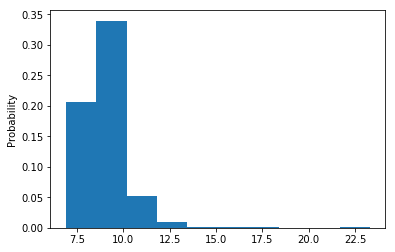

In [54]:
from matplotlib.pylab import *
hist(mc_results, density=True)  # From matplotlib package
ylabel("Probability")
print(mean(mc_results))
print(median(mc_results))
np.exp(mean(np.log(mc_results))) # geometric mean VERY close to 120
pd.DataFrame(mc_results).describe()  # Using the pandas package

In [55]:
#Give a proper name to the file and export
df = pd.DataFrame(mc_results)
df.to_csv('MCsimulation_Scenario_2.csv', sep = ';')